In [33]:
import pandas as pd
import numpy as np
import datetime
import bluebelt as blue

In [7]:
datetime.datetime.now().isocalendar()[0]

2022

In [11]:
datetime.datetime.fromisocalendar(2022, 1, 1)

datetime.datetime(2022, 1, 3, 0, 0)

In [30]:
list(range(3,0,-1))

[3, 2, 1]

In [170]:
def _dummy_frame_function(x):
    function = (np.random.uniform(low=0.000014, high=0.000018) * (x-np.random.uniform(low=150, high=200))**3 -
                np.random.uniform(low=0.0002, high=0.0004) * (x-np.random.uniform(low=500, high=750))**2 -
                np.random.uniform(low=0.2, high=0.8) * x +
                np.random.uniform(low=500, high=600))
    return function

In [171]:
def _get_dummy_frame(years: int = 3, columns: int = 4):
    
    # get the current year
    this_year = datetime.datetime.now().isocalendar()[0]
    
    # trends
    trends = np.random.normal(loc=1, scale=0.1, size=years)
    
    column_data = []
    for column in range(columns):
        name = chr(ord('A') + column)
        
        data = []
        
        for year in range(years-1, -1, -1):
            start_date = datetime.datetime.fromisocalendar(this_year-year, 1, 1)

            
            
            nrows = blue.helpers.date.last_iso_week_in_year(this_year-year) * 7
            series = pd.Series(data=np.array(list(map(_dummy_frame_function, np.arange(0, nrows)))) + (np.random.normal(loc=100*trends[year], scale=4*trends[year], size=nrows)), index=pd.date_range(start=start_date, periods=nrows))
            
            # week & month pattern
            w = pd.Series(data=[1.09, 1.05, 0.96, 0.97, 1.11, 0.32, 0.05] * int(nrows / 7), index=pd.date_range(start=start_date, periods=nrows))
            m = pd.Series(data=series.index.day.map({27: 1.03, 28: 1.06, 29: 1.11, 30: 1.16, 31: 1.09}).fillna(1), index=pd.date_range(start=start_date, periods=nrows))
            
            # set to startpoint
            if year < years - 1:
                series = series + startpoint - series[0]
            startpoint = series[-1]
            
            series = series.multiply(w).multiply(m)
            
            series = series.rename('skill '+chr(ord('A')+column))
            
            data += [series]
        column_data += [pd.concat(data, axis=0)]
    
    frame = pd.concat(column_data, axis=1)
    
    #break the frame
    for col in frame.columns:
        frame.loc[frame.sample(frac=0.02).index, col] = np.nan # break the frame
        
    return frame

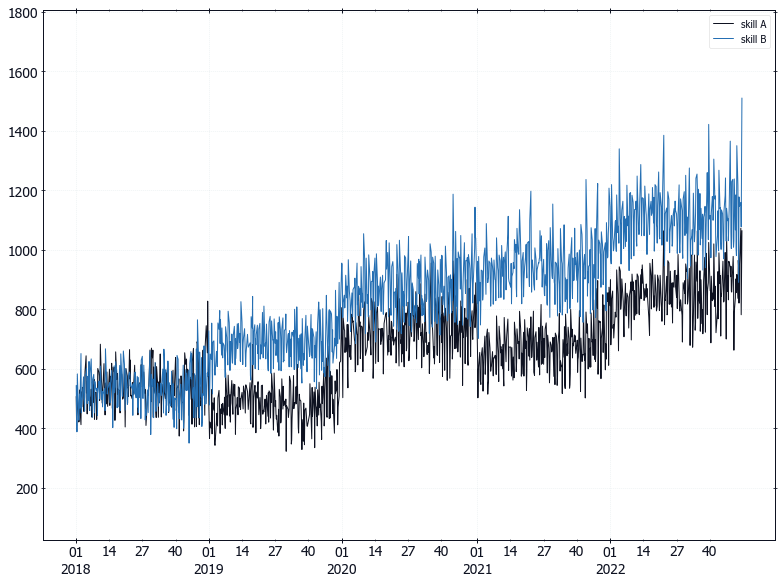

In [173]:
_get_dummy_frame(5, 6).iloc[:,:2]._.workdays().dropna()._.line()

In [61]:
start = ['2019-12-30', '2021-1-4', '2022-01-03']
nrows = [53*7, 52*7, 52*7]
trend = [0.9, 1.0, 1.1]

np.random.seed(27)
f1 = lambda x: 0.000016*(x-170)**3-0.0003*(x-400)**2-0.5*x+250 
f2 = lambda x: 0.000012*(x-180)**3-0.0006*(x-200)**2-0.26*x+270

s1 = pd.concat([
    pd.Series(data=np.random.normal(loc=120*trend[0], scale=4*trend[0], size=nrows[0]), index=pd.date_range(start=start[0], periods=nrows[0]), name='skill A'), 
    pd.Series(data=np.random.normal(loc=120*trend[1], scale=4*trend[1], size=nrows[1]), index=pd.date_range(start=start[1], periods=nrows[1]), name='skill A'),
    pd.Series(data=np.random.normal(loc=120*trend[2], scale=4*trend[2], size=nrows[2]), index=pd.date_range(start=start[2], periods=nrows[2]), name='skill A')
])
s2 = pd.concat([
    pd.Series(data=np.random.weibull(12*trend[0], nrows[0]) * 25*trend[0] + 25, index=pd.date_range(start=start[0], periods=nrows[0]), name='skill B'),
    pd.Series(data=np.random.weibull(12*trend[1], nrows[1]) * 25*trend[1] + 25, index=pd.date_range(start=start[1], periods=nrows[1]), name='skill B'),
    pd.Series(data=np.random.weibull(12*trend[2], nrows[2]) * 25*trend[2] + 25, index=pd.date_range(start=start[2], periods=nrows[2]), name='skill B')
])
s3 = pd.concat([
    pd.Series(data=np.array(list(map(f1, np.arange(0, nrows[0])))) + (np.random.weibull(7*trend[0], nrows[0]) * 45*trend[0]), index=pd.date_range(start=start[0], periods=nrows[0]), name='skill C'),
    pd.Series(data=np.array(list(map(f1, np.arange(0, nrows[1])))) + (np.random.weibull(7*trend[1], nrows[1]) * 45*trend[1]), index=pd.date_range(start=start[1], periods=nrows[1]), name='skill C'),
    pd.Series(data=np.array(list(map(f1, np.arange(0, nrows[2])))) + (np.random.weibull(7*trend[2], nrows[2]) * 45*trend[2]), index=pd.date_range(start=start[2], periods=nrows[2]), name='skill C')
])
s4 = pd.concat([
    pd.Series(data=np.array(list(map(f2, np.arange(0, nrows[0])))) + (np.random.normal(loc=120*trend[0], scale=4*trend[0], size=nrows[0])), index=pd.date_range(start=start[0], periods=nrows[0]), name='skill D'),
    pd.Series(data=np.array(list(map(f2, np.arange(0, nrows[1])))) + (np.random.normal(loc=120*trend[1], scale=4*trend[1], size=nrows[1])), index=pd.date_range(start=start[1], periods=nrows[1]), name='skill D'),
    pd.Series(data=np.array(list(map(f2, np.arange(0, nrows[2])))) + (np.random.normal(loc=120*trend[2], scale=4*trend[2], size=nrows[2])), index=pd.date_range(start=start[2], periods=nrows[2]), name='skill D')
])

frame = pd.concat([s1, s2, s3, s4], axis=1)

# week & month pattern
w = pd.Series(data=[1.09, 1.05, 0.96, 0.97, 1.11, 0.32, 0.05] * int(sum(nrows) / 7), index=pd.date_range(start=start[0], periods=sum(nrows)))
m = pd.Series(data=s1.index.day.map({27: 1.03, 28: 1.06, 29: 1.11, 30: 1.16, 31: 1.09}).fillna(1), index=pd.date_range(start=start[0], periods=sum(nrows)))
frame = frame.multiply(w, axis=0).multiply(m, axis=0)

#break the frame
for col in frame.columns:
    frame.loc[frame.sample(frac=0.05).index, col] = np.nan # break the frame

In [3]:
frame.to_pickle('../data/frame.pkl')